In [2]:
import xarray as xr
import  numpy as np
import matplotlib.pyplot as plt

In [3]:
d = xr.open_dataset('imd_precip_anomaly_1979_1017.nc')
def is_amj(month):
    return (month >= 6) & (month <= 9)

d = d.sel(latitude=slice(15,25),longitude=slice(73,85),time=slice('1979-06-01','2017-09-30'))
d_jjas = d.sel(time=is_amj(d['time.month'])).mean(dim=['latitude','longitude'])
rf_jjas = d_jjas['rf'].squeeze()

# climatology

function for climatology: x is data array and days refers no. of days of year masked in data           
here data is masked for jjas season so days is taken as 122

In [4]:
def climatology(x,days):
    y = np.empty([days])
    for k in range(days):
        y[k] = x[k::days].mean()
    
    return y

rf_clim_jjas = climatology(rf_jjas,122)

# Anomaly

function for ANOMALY: x is data array, y is climatological array obtained from previous tab, and days refers no. of days of year masked in data

In [5]:
def anomaly(x,y,days):
    z = np.empty([len(x)])
    for k in range(days):
        z[k::days] = x[k::days] - y[k]
        
    return z
rfa_jjas = anomaly(rf_jjas,rf_clim_jjas,122)
rfa_jjas = rfa_jjas/np.std(rfa_jjas)

# Active and Break Phase of Indian summer monsoon

Active and Break phase of monsoon is define for core region[15°–25°N; 73°–85°E] rainfall over central india.       
Active (Break) phase are define as persistence of std deviation of rainfall greater (lesser) than 1 (-1) for atleast 3-days.  

In [6]:
active = np.zeros([4758])
for k in range(39):
    for i in range(k*122,k*122+122):
        if (i==k*122 or i==k*122+1 or i==k*122+121 or i==k*122+122):#removing condition for first 
            active[i]=np.nan                                        #and last two days of season
        elif (np.all(rfa_jjas[i-2:i+1]>1) or np.all(rfa_jjas[i-1:i+2]>1) or np.all(rfa_jjas[i:i+3]>1)):
            active[i]=rfa_jjas[i]
        else:
            active[i]=np.nan
            
brake = np.zeros([4758])
for k in range(39):
    for i in range(k*122,k*122+122):
        if (i==k*122 or i==k*122+1 or i==k*122+121 or i==k*122+122):
            brake[i]=np.nan
        elif (np.all(rfa_jjas[i-2:i+1]<-1) or np.all(rfa_jjas[i-1:i+2]<-1) or np.all(rfa_jjas[i:i+3]<-1)):
            brake[i]=rfa_jjas[i]
        else:
            brake[i]=np.nan

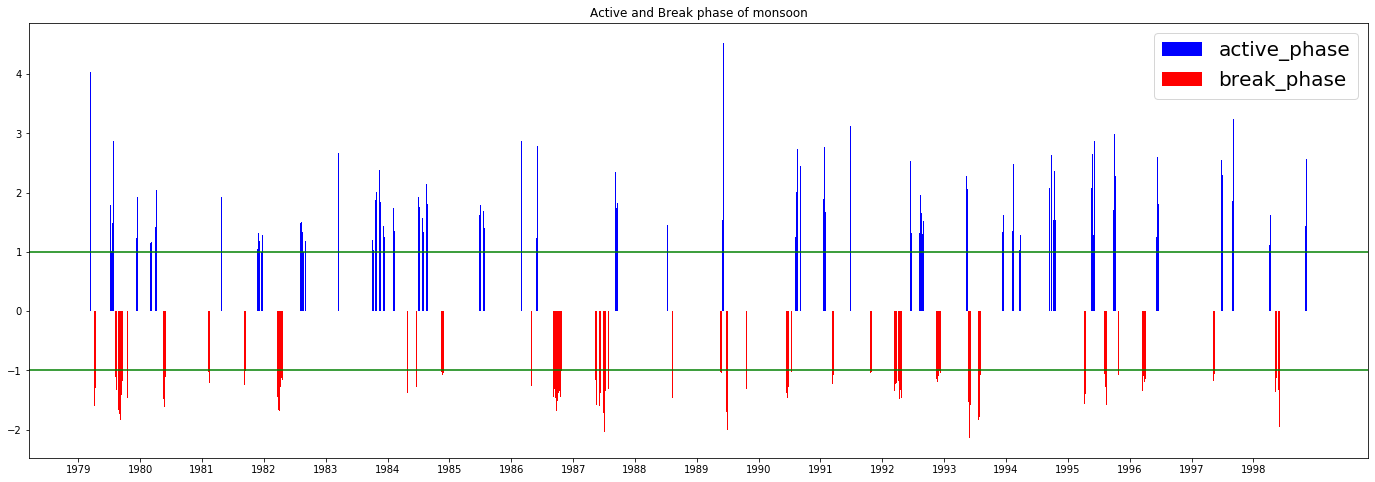

In [7]:
plt.figure(figsize=[24,8])
plt.bar(np.arange(1,2441),active[0:2440],label='active_phase',lw='1',color='blue')
plt.bar(np.arange(1,2441),brake[0:2440],label='break_phase',lw='1',color = 'red')
plt.axhline(y=1,color = 'green')
plt.axhline(y=-1,color = 'green')

plt.legend(loc = 'upper right',prop={'size': 20})
# plt.xlabel('lags in days')
plt.title('Active and Break phase of monsoon')
plt.xticks(np.arange(1,2441,122),np.arange(1979,1999,1))
plt.show()
# plt.savefig('model_com_august.png',dpi=400)